# Plot pickled results from TimescalesForMultipleMoulinShape.py 
pickled list of dictionary

Created on Mon Oct 21 18:52:37 2019
@author: cctrunz




In [1]:
%pylab inline
#Import packages
import pickle #to unpickle
import numpy as np #for calculations ex pi, ...
import matplotlib.pyplot as plt #to plot
import matplotlib.gridspec as gridspec
matplotlib.rcParams.update({'font.size': 24})
figsize_1page=(7.48,3)

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['axes.labelsize'] = 8
matplotlib.rcParams['axes.labelweight'] = 'bold'
matplotlib.rc('xtick', labelsize=8)     
matplotlib.rc('ytick', labelsize=8)

#colors:
Red = '#ED2224'
Orange = '#FBB263'
Green = '#A2D39E'
Blue = '#15B4E9'
Purple = '#6B52A2'

Populating the interactive namespace from numpy and matplotlib


## Profiles

###  Plot Equilibrium head (h_eq) vs distance from Margin, for a varying Recharge

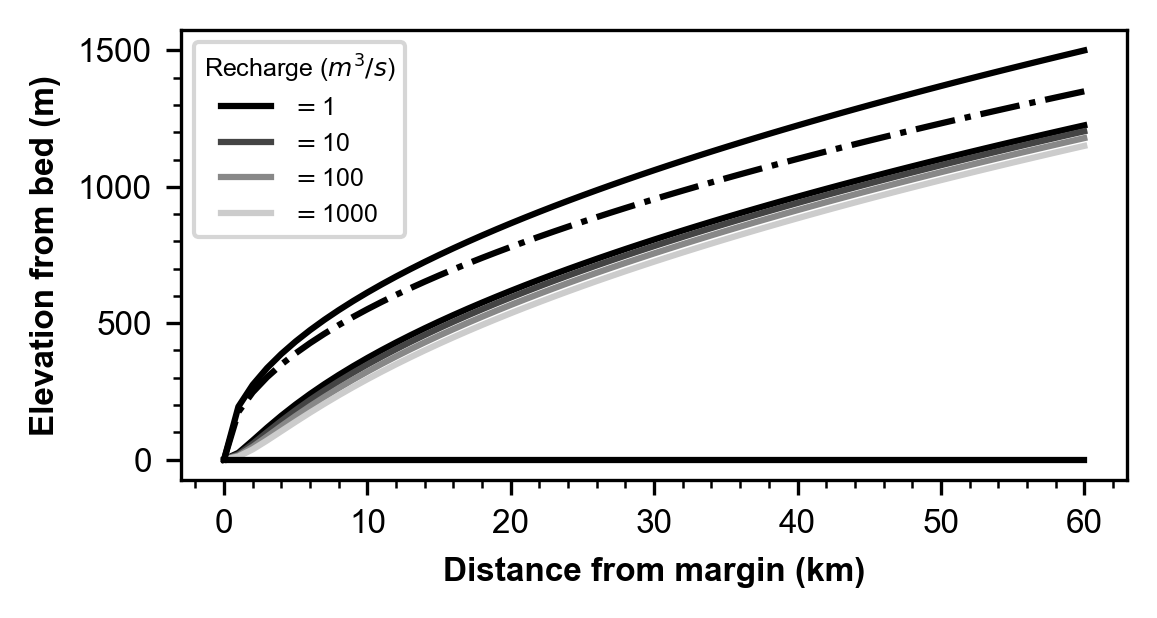

In [2]:
with open('Pickled_results/results_Profil_heq_withVariousR_AGU19','rb') as file:
   reslist = pickle.load(file)
with open('Pickled_results/param_Profil_heq_withVariousR_AGU19','rb') as file:
   paramlist = pickle.load(file)

variable_name = 'h_eq_d'
changing_param = 'R'

fig, ax = plt.subplots(figsize=(3.8,2),dpi=300)#, tight_layout=True)
n_lines = len(paramlist[changing_param])
color_idx = np.linspace(0, 0.8, n_lines)

profile = paramlist['L_profile']
profile = np.insert(profile,0,0)

for param, i in zip(paramlist[changing_param],color_idx): 
    
    timescale = np.array ([ result[variable_name] 
                           for result in reslist 
                           if result[changing_param] == param]) 
    timescale =np.insert(timescale,0,0)
    icesheet_profile = np.array ([ result['z'] 
                           for result in reslist 
                           if result[changing_param] == param])
    icesheet_profile = np.insert(icesheet_profile,0,0)
    
    lines = plt.plot(profile/1000,timescale,color=plt.cm.gray(i), lw=1.5, label='$=$%s'%param)
    
    
    legend=plt.legend(title="Recharge ($m^3/s$)",fontsize=6)
    legend.get_title().set_fontsize('6') #legend 'Title' fontsize
    
plt.plot(profile/1000,icesheet_profile,'-',color='black',lw=1.5)
plt.plot(np.linspace(0,60,10),np.zeros(10),'-',color='black',lw=1.5)

plt.plot(profile/1000,icesheet_profile*0.9,'-.',color='black',lw=1.5)

plt.subplots_adjust(left=0.15, right=0.98, top=0.95, bottom=0.2)
plt.ylabel('Elevation from bed (m)')
plt.xlabel('Distance from margin (km)')

plt.minorticks_on()

plt.savefig('Figures/ChannelHydraulic.pdf')

### Plot timescales vs distance from Margin, for varying slope around heq

In [3]:
with open('Pickled_results_JGR/results_TauProfile_slope_heq_JGR','rb') as file:
   reslist_3 = pickle.load(file)
with open('Pickled_results_JGR/param_TauProfile_slope_heq_JGR','rb') as file:
   paramlist_3= pickle.load(file)

with open('Pickled_results_JGR/results_TauProfile_slope_hmiddle_JGR','rb') as file:
   reslist_2 = pickle.load(file)
with open('Pickled_results_JGR/param_TauProfile_slope_hmiddle_JGR','rb') as file:
   paramlist_2 = pickle.load(file)

with open('Pickled_results_JGR/results_TauProfile_slope_cylinder_JGR','rb') as file:
   reslist_1 = pickle.load(file)
with open('Pickled_results_JGR/param_TauProfile_slope_cylinder_JGR','rb') as file:
   paramlist_1 = pickle.load(file)

In [4]:


#colors = colors = ((0.8,0.8,0.8),(0.6,0.6,0.6),(0,0,0),(0.4,0.4,0.4),(0,0,0))
colors = (Red, Orange ,(0,0,0), Blue, Purple) #5colors
        #[plt.cm.Greys(i) for i in np.linspace(0.4,1,5)]#[plt.cm.cividis(i) for i in np.linspace(1,0.3,5)]
linestyles = ('solid','solid',(0, (1, 0.5)),'solid','solid')
profile = paramlist_1['L_profile']/1000
osc_max = 5
osc_min = 0
dam_max = 10
dam_min = -2

fig, ax = plt.subplots(figsize=(7.48,3),dpi=300)
n_lines = 5
#color_idx = np.linspace(0, 0.5, n_lines)
gs1 = gridspec.GridSpec(2,3)
gs1.update(wspace=0, hspace=0) # set the spacing between axes. 
frameon=False

'''Change radius with fixed slope'''   
ax1 = subplot(gs1[0])
for param, i in zip(paramlist_1['r'],range(5)):    
    timescale = np.array ([ result['oscillation'] 
                           for result in reslist_1 
                           if result['r'] == param])  
    lines = plt.plot(profile,timescale,color=colors[i], lw=2, linestyle=linestyles[i], label='$=$%s'%param)
    plt.ylim([osc_min,osc_max])
    plt.yticks([1,2,3,4])
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.ylabel('$T_{\rm osc}$ (days)')
    ax1.text(2, osc_max, 'a',fontsize=12)

    
ax4 = subplot(gs1[3])#,sharex=ax1
for param, i in zip(paramlist_1['r'],range(5)):    
    timescale = np.array ([ result['damping'] 
                           for result in reslist_1 
                           if result['r'] == param])  
    lines = plt.plot(profile,timescale,color=colors[i], lw=2, linestyle=linestyles[i], label='$=$%s'%param)
    plt.ylim([dam_min,dam_max])
    plt.yticks([0,2,4,6,8])
    plt.ylabel('$T_{\rm damp}$ (days)')
    ax4.text(2, dam_max, 'd',fontsize=12)
    
    
    
'''Change slope with h_middle fixed'''
ax2 = subplot(gs1[1])#, sharey=ax1
for param, i in zip(paramlist_2['m'],range(5)):    
    timescale = np.array ([ result['oscillation'] 
                           for result in reslist_2 
                           if result['m'] == param])  
    lines = plt.plot(profile,timescale,color=colors[i], lw=2, linestyle=linestyles[i], label='$=$%s'%param)
    plt.ylim([osc_min,osc_max])
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.yticks([])
    ax2.text(2, osc_max, 'b',fontsize=12)

    
ax5 = subplot(gs1[4])#,sharex=ax2, sharey=ax4
for param, i in zip(paramlist_2['m'],range(5)):    
    timescale = np.array ([ result['damping'] 
                           for result in reslist_2 
                           if result['m'] == param])  
    lines = plt.plot(profile,timescale,color=colors[i], lw=2, linestyle=linestyles[i], label='$=$%s'%param)
    plt.ylim([dam_min,dam_max])
    plt.setp(ax5.get_yticklabels(), visible=False)
    plt.xlabel('Distance from margin (km)')
    plt.yticks([])
    ax5.text(2, dam_max, 'e',fontsize=12)
    
    
    
'''Change slope with h_eq fixed'''
ax3 = subplot(gs1[2])#, sharey=ax1
for param, i in zip(paramlist_3['m'],range(5)):    
    timescale = np.array ([ result['oscillation'] 
                           for result in reslist_3 
                           if result['m'] == param])  
    lines = plt.plot(profile,timescale,color=colors[i], lw=2, linestyle=linestyles[i], label='$=$%s'%param)
    plt.ylim([osc_min,osc_max])
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    plt.yticks([])
    ax3.text(2, osc_max, 'c',fontsize=12)

    
ax6 = subplot(gs1[5])#,sharex=ax3, sharey=ax4
for param, i in zip(paramlist_3['m'],range(5)):    
    timescale = np.array ([ result['damping'] 
                           for result in reslist_3 
                           if result['m'] == param])  
    lines = plt.plot(profile,timescale,color=colors[i], lw=2, linestyle=linestyles[i], label='$=$%s'%param)
    plt.ylim([dam_min,dam_max])
    plt.setp(ax6.get_yticklabels(), visible=False)
    plt.yticks([])
    ax6.text(2, dam_max, 'f',fontsize=12)

plt.subplots_adjust(left=0.08, right=0.99, top=0.96, bottom=0.14)


plt.savefig('Figures/Timescales_osc_damp.pdf')

ValueError: x and y must have same first dimension, but have shapes (60,) and (1,)

ValueError: 
$T_{m osc}$ (days)
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 2244x900 with 3 Axes>